<a href="https://colab.research.google.com/github/LeandroCoelhos/case_house_prices/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
treino = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/case_house_prices/main/train.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/case_house_prices/main/test.csv')

In [10]:
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
treino.shape, teste.shape

((1460, 81), (1459, 80))

## Interpretação das variáveis e Engenharia de Features

Esse conjunto de dados demanda uma interpretação das variáveis, vendo o que é possivel ser tranformado em variáveis numéricas que façam sentido para um modelo de regressão linear

Explorar em uma etapa futura

In [22]:
#treino.info()

In [23]:
'''colunas = treino.columns
for col in colunas:
  print('\n',col)
  display(treino[col].value_counts(dropna=False))'''

"colunas = treino.columns\nfor col in colunas:\n  print('\n',col)\n  display(treino[col].value_counts(dropna=False))"

# Abordagem Simplista

Pegar apenas as features numéricas

In [29]:
col_numericas = list(treino.dtypes[treino.dtypes != 'object'].index)

In [33]:
df_treino = treino[col_numericas]

<AxesSubplot:>

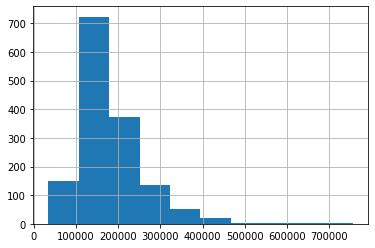

In [34]:
df_treino.SalePrice.hist() # não temos uma distribuição normal dos preços como exige a Regressão Linear

## Transformação da variavel resposta para se ajustar a uma distribuição normal

<ipython-input-41-b93c4cfec064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino['SalePrice'] = np.log1p(df_treino.SalePrice)


<AxesSubplot:>

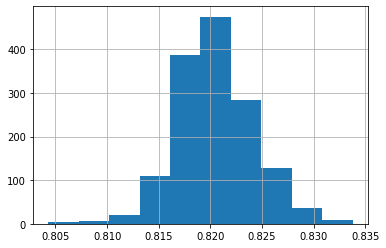

In [41]:
df_treino['SalePrice'] = np.log1p(df_treino.SalePrice)
df_treino.SalePrice.hist() 

In [42]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [46]:
df_treino = df_treino.dropna()#retirar nulos
df_treino = df_treino.drop(columns=['Id'])

In [47]:
x_treino = df_treino.drop(columns=['SalePrices'])
y_treino = df_treino['SalePrices']

In [48]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score